#Merging Datasets

In [66]:
import pandas as pd
import matplotlib.pylab as plt

# Define the paths to the datasets
productA_path = r'C:\Users\sravy\Downloads\ProductA.xlsx'
fb_impressions_path = r'C:\Users\sravy\Downloads\ProductA_fb_impressions.xlsx'
google_clicks_path = r'C:\Users\sravy\Downloads\ProductA_google_clicks.xlsx'

# Load the datasets into DataFrames
productA = pd.read_excel(productA_path)
fb_impressions = pd.read_excel(fb_impressions_path)
google_clicks = pd.read_excel(google_clicks_path)

# Merge the datasets on 'Day Index'
merged_data = productA.merge(google_clicks, on='Day Index').merge(fb_impressions, on='Day Index')

# Reorder the columns
merged_data = merged_data[['Day Index', 'Quantity', 'Clicks', 'Impressions']]

# Save the merged dataset to an Excel file
merged_data_path = r'C:\Users\sravy\Downloads\master_dataset.xlsx'
merged_data.to_excel(merged_data_path, index=False)

# Display the merged dataset with a heading
print("\n### Merged Data ###")
print(merged_data.head())



### Merged Data ###
   Day Index  Quantity  Clicks  Impressions
0 2021-12-01        14     445          620
1 2021-12-02        10     433          890
2 2021-12-03        13     424          851
3 2021-12-04        22     427          881
4 2021-12-05        33     451          678


#Descriptive Statistics

In [67]:
merged_data.shape

(212, 4)

In [68]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Quantity     212 non-null    int64         
 2   Clicks       212 non-null    int64         
 3   Impressions  212 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 8.3 KB


In [71]:
merged_data.describe()

,Quantity,Clicks,Impressions
count,212.000000,212.00000,212.000000
mean,17.542453,358.20283,1531.702830
std,5.790423,164.52160,440.660783
min,5.000000,60.00000,620.000000
25%,13.750000,154.00000,1209.750000
50%,17.000000,402.50000,1460.000000
75%,21.000000,492.75000,1862.000000
max,38.000000,726.00000,2707.000000


#Missing Value Check

In [72]:
print("Null values:")
merged_data.isnull().sum()

Null values:


Day Index      0
Quantity       0
Clicks         0
Impressions    0
dtype: int64

In [73]:
merged_data.shape

(212, 4)

#Dropping Duplicates

In [74]:
merged_data.drop_duplicates()

,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678
...,...,...,...,...
207,2022-06-26,13,114,1218
208,2022-06-27,16,106,1311
209,2022-06-28,13,109,885
210,2022-06-29,16,60,1000


#Analysing the Outliers

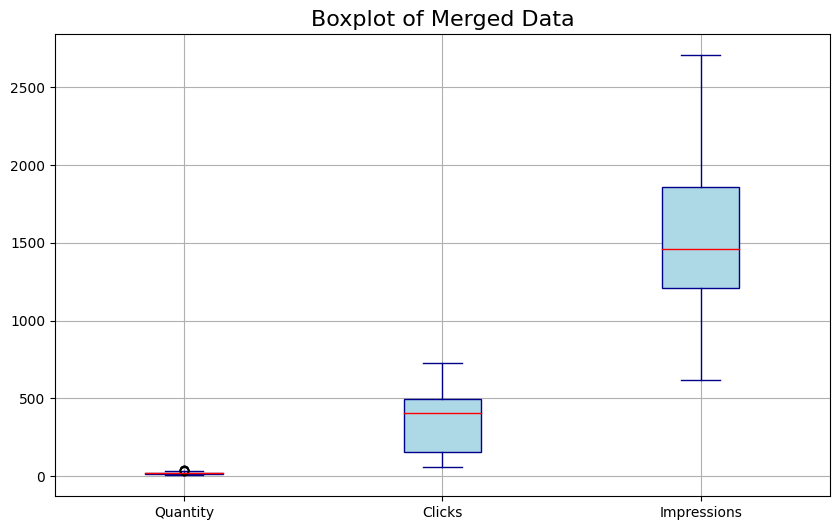

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
merged_data.boxplot(patch_artist=True, 
                    boxprops=dict(facecolor='lightblue', color='darkblue'), 
                    whiskerprops=dict(color='darkblue'),
                    capprops=dict(color='darkblue'),
                    medianprops=dict(color='red'))
plt.title("Boxplot of Merged Data", fontsize=16)
plt.show()


In [79]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

quantity_outliers = find_outliers_iqr(merged_data, 'Quantity')

print("Quantity Outliers:")
print(quantity_outliers[['Day Index', 'Quantity']])


Quantity Outliers:
     Day Index  Quantity
4   2021-12-05        33
9   2021-12-10        38
78  2022-02-17        38
113 2022-03-24        32
142 2022-04-22        36


#Replacing the outliers with 93rd percentile value

In [82]:
def replace_outliers_with_percentile(df, column, percentile=93):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    percentile_value = df[column].quantile(percentile / 100)
    df[column] = df[column].apply(lambda x: percentile_value if x < lower_bound or x > upper_bound else x)
    return percentile_value

percentile_value = replace_outliers_with_percentile(merged_data, 'Quantity', 93)

print(f"93rd Percentile Value: {percentile_value}")


93rd Percentile Value: 26.0


In [83]:
def add_imputed_column(df, column, percentile=93):
    percentile_value = df[column].quantile(percentile / 100)
    df['Imputed_Quantity'] = df[column].apply(lambda x: percentile_value if x < df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)) or x > df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)) else x)
    return df

merged_data = add_imputed_column(merged_data, 'Quantity', 93)


In [85]:
if quantity_outliers.empty:
    print("Quantity Outliers:\n0")
else:
    print(f"Quantity Outliers:\n{quantity_outliers[['Day Index', 'Quantity']]}")


Quantity Outliers:
0


#FEATURE ENGINEERING

In [86]:
merged_data.head()

,Day Index,Quantity,Clicks,Impressions,Imputed_Quantity
0,2021-12-01,14.0,445,620,14.0
1,2021-12-02,10.0,433,890,10.0
2,2021-12-03,13.0,424,851,13.0
3,2021-12-04,22.0,427,881,22.0
4,2021-12-05,26.0,451,678,26.0


In [87]:
import numpy as np

merged_data['log_quantity'] = np.log1p(merged_data['Quantity'])
merged_data['log_clicks'] = np.log1p(merged_data['Clicks'])
merged_data['log_impressions'] = np.log1p(merged_data['Impressions'])


In [88]:
merged_data['Month'] = merged_data['Day Index'].dt.month
merged_data['Year'] = merged_data['Day Index'].dt.year


In [89]:
merged_data['Month_Name'] = merged_data['Day Index'].dt.month_name()


In [90]:
merged_data['Day_Of_Week'] = merged_data['Day Index'].dt.day_name()


In [91]:
merged_data['Week_Of_Month'] = (merged_data['Day Index'].dt.day - 1) // 7 + 1


In [92]:
merged_data['Day_Of_Week_Numeric'] = merged_data['Day Index'].dt.weekday


In [93]:
merged_data['Month_Numeric'] = merged_data['Day Index'].dt.month


In [96]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in weekdays:
    merged_data[day] = merged_data['Day_Of_Week'].apply(lambda x: 1 if x == day else 0)


In [97]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for month in months:
    merged_data[month] = merged_data['Month_Name'].apply(lambda x: 1 if x == month else 0)


In [98]:
merged_data.fillna(0, inplace=True)


In [100]:
merged_data.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions', 'Imputed_Quantity',
       'log_quantity', 'log_clicks', 'log_impressions', 'Month', 'Year',
       'Month_Name', 'Day_Of_Week', 'Week_Of_Month', 'Day_Of_Week_Numeric',
       'Month_Numeric', 'Weekday_1', 'Month_1', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December'],
      dtype='object')

In [102]:
merged_data.head()

,Day Index,Quantity,Clicks,Impressions,Imputed_Quantity,log_quantity,log_clicks,log_impressions,Month,Year,Month_Name,Day_Of_Week,Week_Of_Month,Day_Of_Week_Numeric,Month_Numeric,Weekday_1,Month_1,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,April,May,June,July,August,September,October,November,December
0,2021-12-01,14.0,445,620,14.0,2.708050,6.100319,6.431331,12,2021,December,Wednesday,1,2,12,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2021-12-02,10.0,433,890,10.0,2.397895,6.073045,6.792344,12,2021,December,Thursday,1,3,12,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2021-12-03,13.0,424,851,13.0,2.639057,6.052089,6.747587,12,2021,December,Friday,1,4,12,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2021-12-04,22.0,427,881,22.0,3.135494,6.059123,6.782192,12,2021,December,Saturday,1,5,12,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2021-12-05,26.0,451,678,26.0,3.295837,6.113682,6.520621,12,2021,December,Sunday,1,6,12,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [103]:
merged_data.to_csv('final_dataset.csv', index=False)


#Data Analysis

##Correlation Heatmap

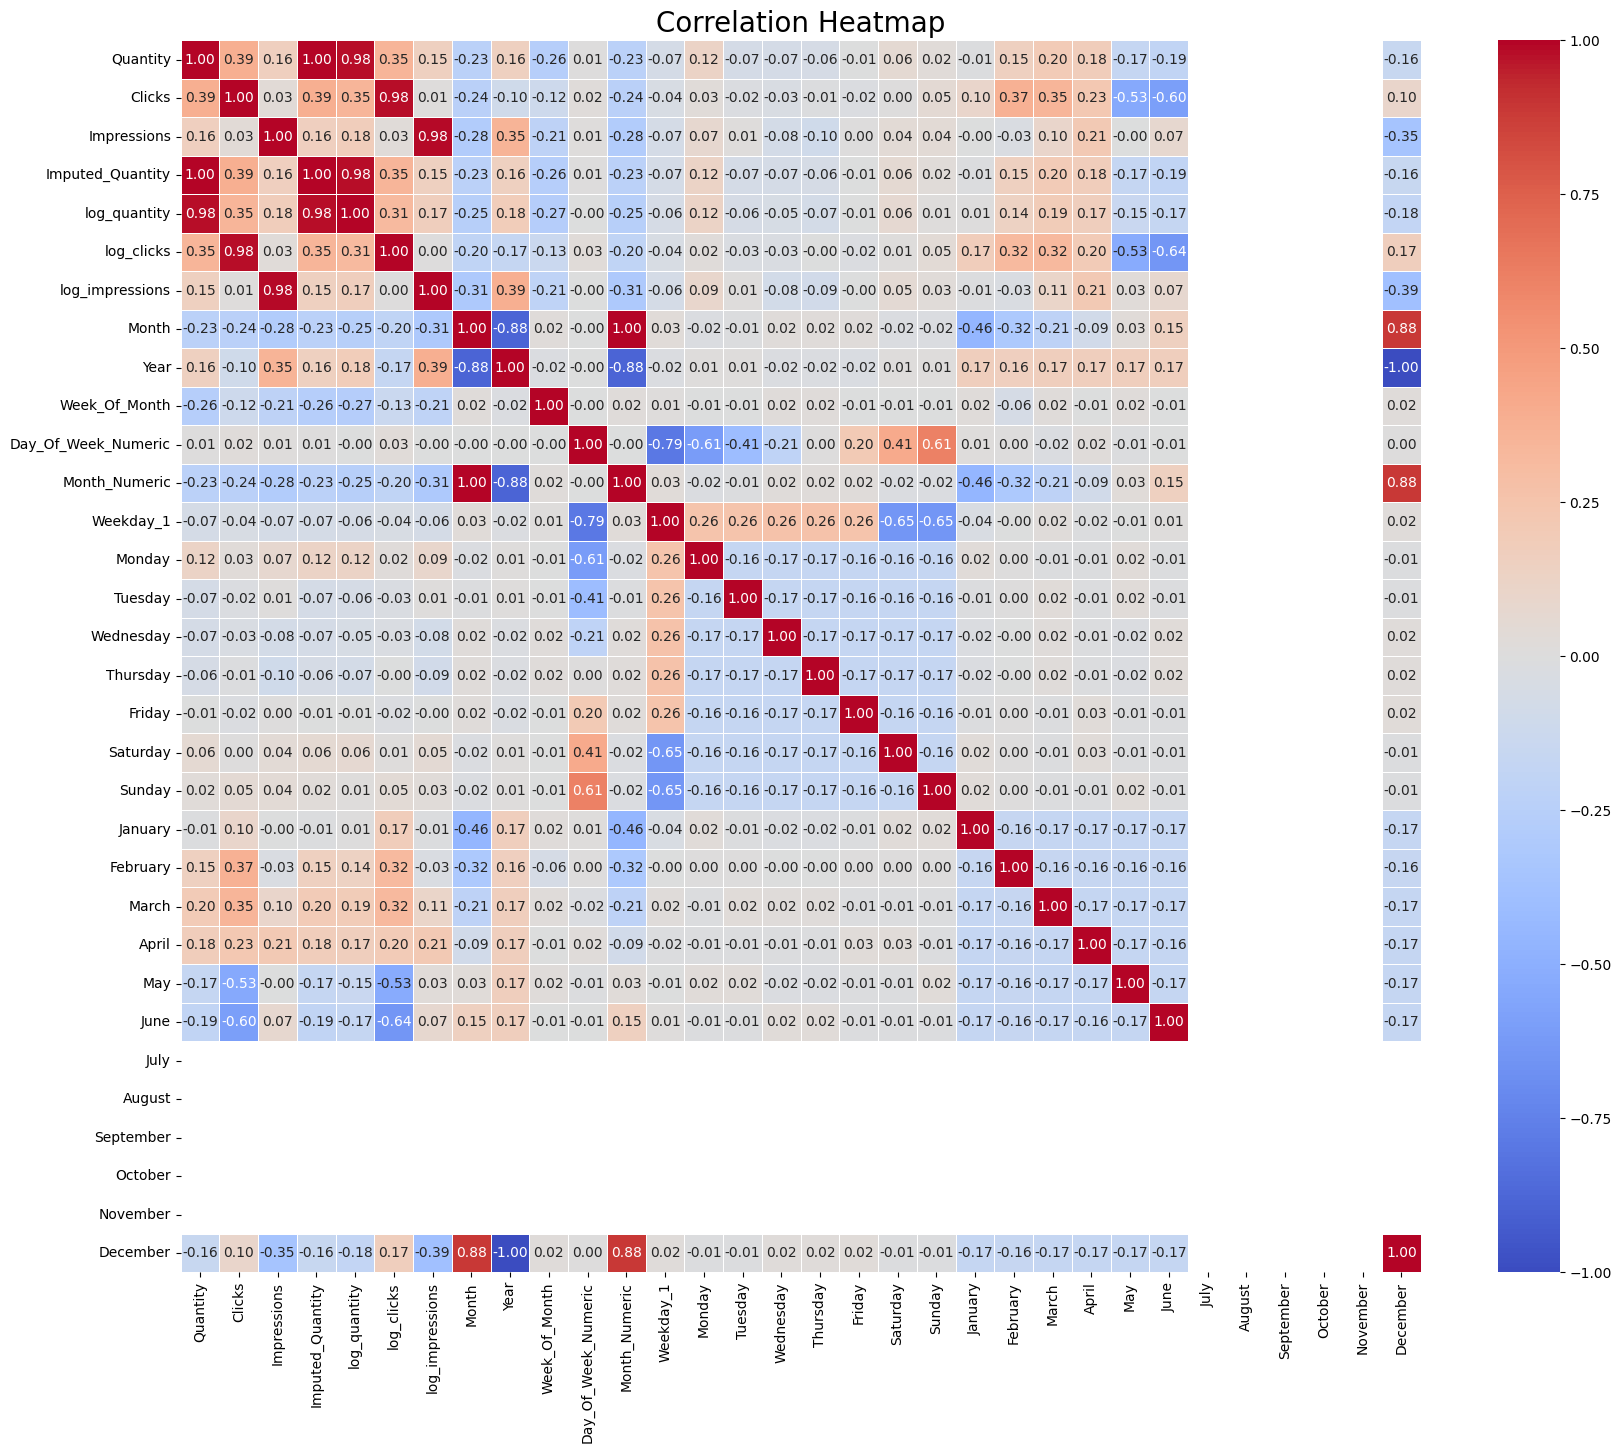

In [109]:
# Drop the 'month_1' column
merged_data = merged_data.drop(columns=['Month_1'], axis=1)

# Plot the correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()


There is a strong positive correlation between Quantity and Clicks.
Impressions have a moderate positive correlation with Quantity.
Impressions and Clicks have a very weak positive correlation.

##Quantity vs Clicks

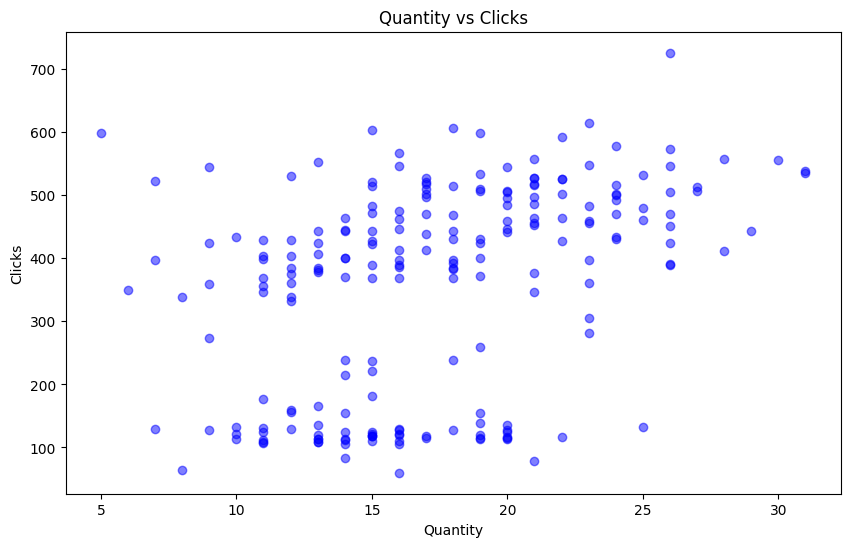

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Quantity'], merged_data['Clicks'], c='blue', alpha=0.5)
plt.title('Quantity vs Clicks')
plt.xlabel('Quantity')
plt.ylabel('Clicks')
plt.show()


##Quantity vs Impressions

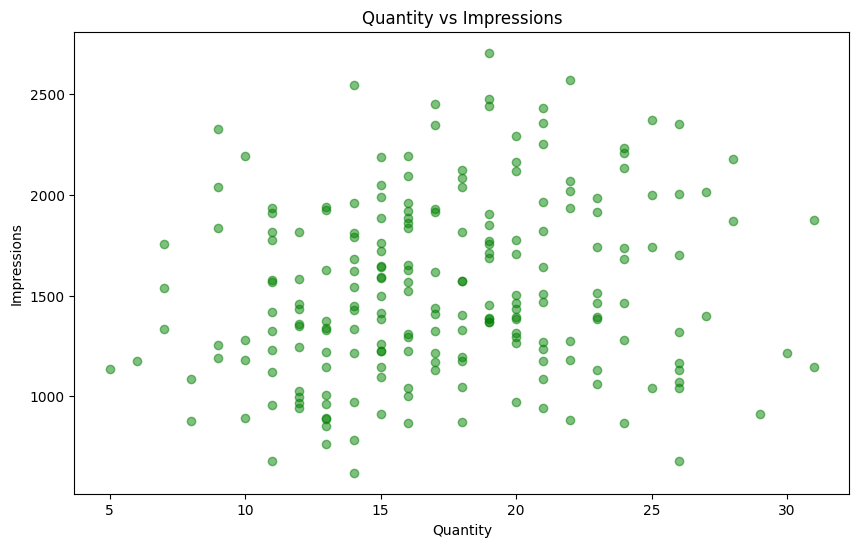

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Quantity'], merged_data['Impressions'], c='green', alpha=0.5)
plt.title('Quantity vs Impressions')
plt.xlabel('Quantity')
plt.ylabel('Impressions')
plt.show()


##Clicks vs Impressions

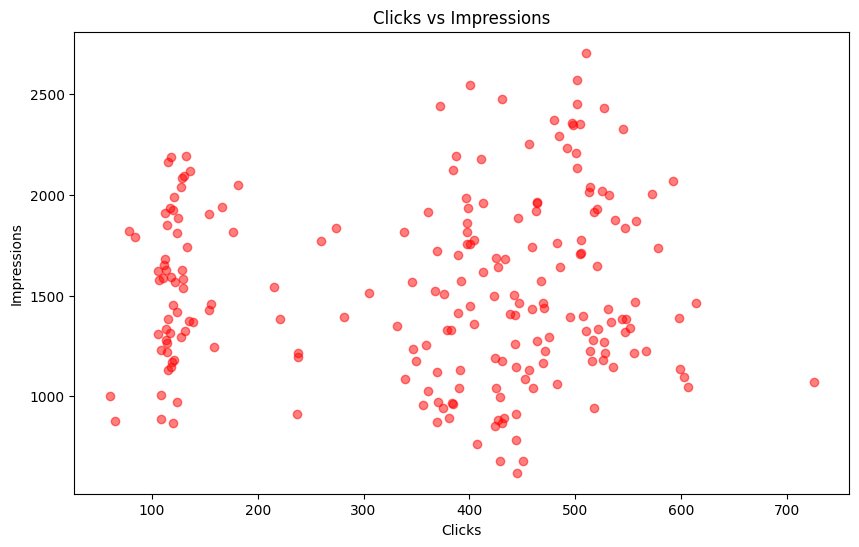

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Clicks'], merged_data['Impressions'], c='red', alpha=0.5)
plt.title('Clicks vs Impressions')
plt.xlabel('Clicks')
plt.ylabel('Impressions')
plt.show()


##Day-wise Qunatity analysis

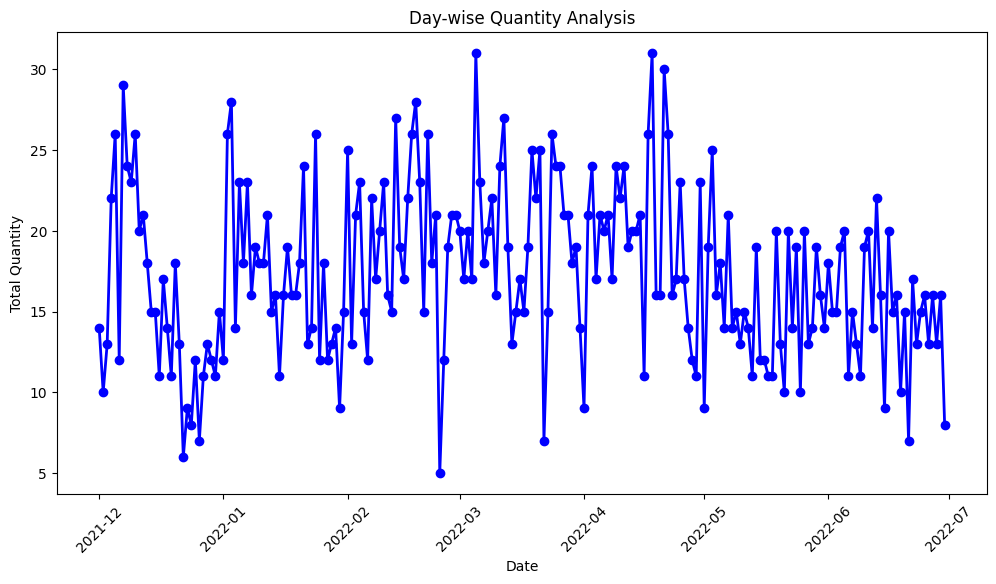

In [119]:
# Group by Day Index and sum the Quantity for each day
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'])
daily_quantity = merged_data.groupby(merged_data['Day Index'].dt.date)['Quantity'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_quantity.index, daily_quantity.values, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Day-wise Quantity Analysis')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.show()


##Sales are peaked in December,March and April and least impressions in End of december and January

##Day-wise Clicks Analysis

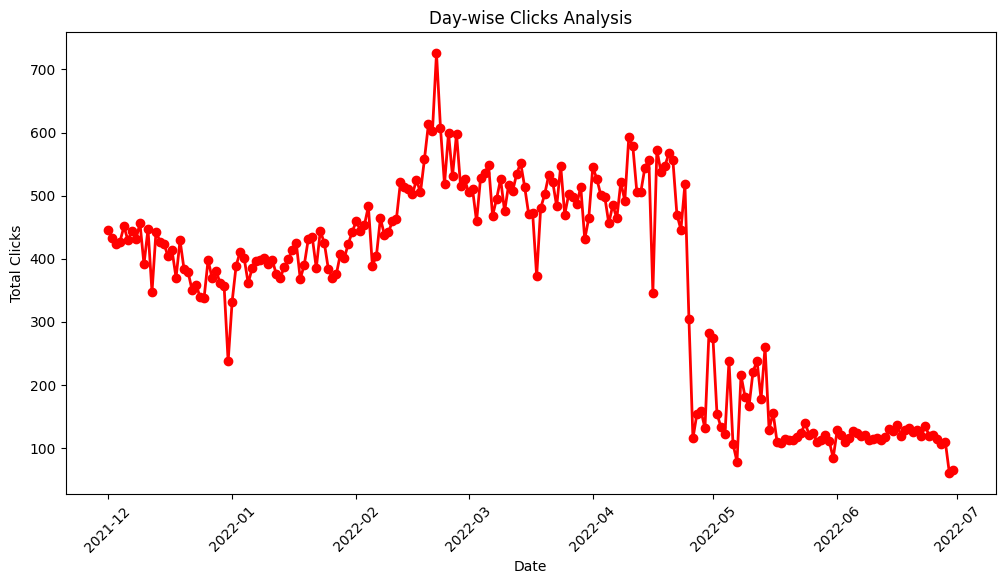

In [114]:
daily_clicks = merged_data.groupby(merged_data['Day Index'].dt.date)['Clicks'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_clicks.index, daily_clicks.values, marker='o', color='red', linestyle='-', linewidth=2)
plt.title('Day-wise Clicks Analysis')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.show()


##Day-wise Impressions Analysis

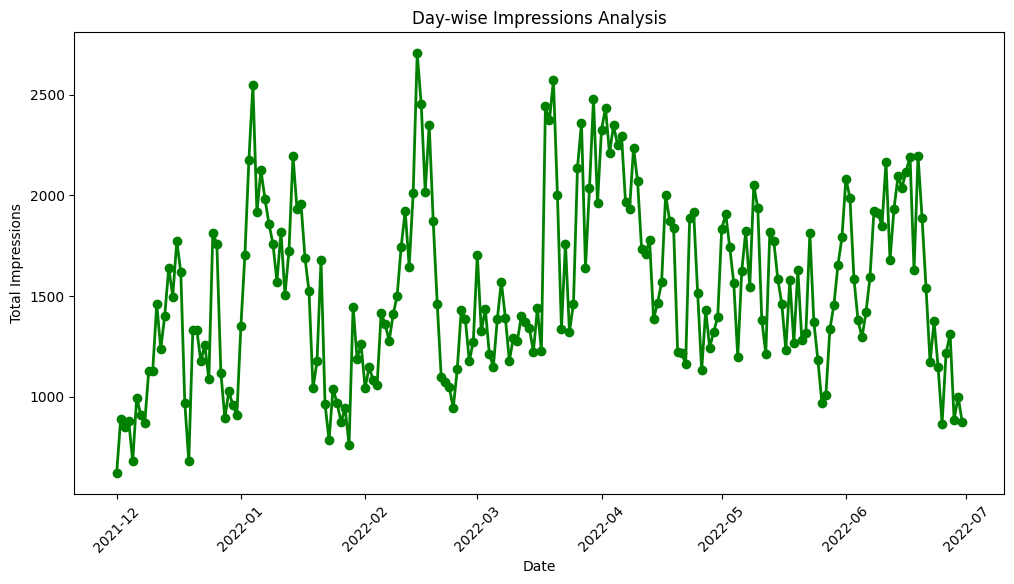

In [115]:
daily_impressions = merged_data.groupby(merged_data['Day Index'].dt.date)['Impressions'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_impressions.index, daily_impressions.values, marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Day-wise Impressions Analysis')
plt.xlabel('Date')
plt.ylabel('Total Impressions')
plt.xticks(rotation=45)
plt.show()


###Impressions peaked in february month 
###Least impressions are in December

##Day-wise Total Analysis (Quantity, Clicks, and Impressions)

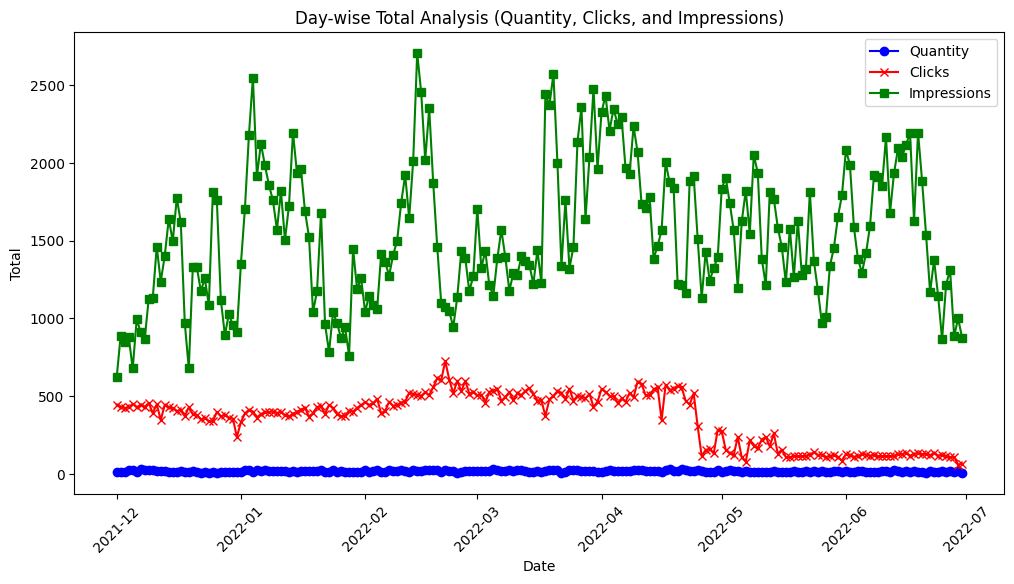

In [116]:
daily_total = merged_data.groupby(merged_data['Day Index'].dt.date)[['Quantity', 'Clicks', 'Impressions']].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_total.index, daily_total['Quantity'], label='Quantity', color='blue', marker='o')
plt.plot(daily_total.index, daily_total['Clicks'], label='Clicks', color='red', marker='x')
plt.plot(daily_total.index, daily_total['Impressions'], label='Impressions', color='green', marker='s')
plt.title('Day-wise Total Analysis (Quantity, Clicks, and Impressions)')
plt.xlabel('Date')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend()
plt.show()


#WEEKDAYS ANALYSIS

##Weekday-wise Quantity Analysis

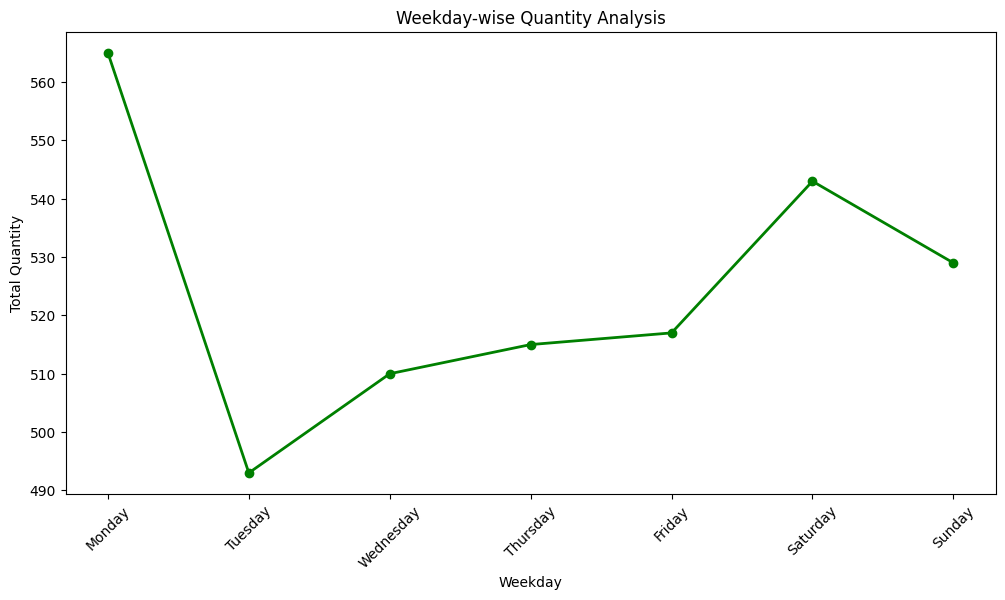

In [122]:
# Group by Day Index and sum the Quantity for each weekday
weekday_quantity = merged_data.groupby(merged_data['Day Index'].dt.dayofweek)['Quantity'].sum()

# Map the day numbers to weekday names
weekday_quantity.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
plt.plot(weekday_quantity.index, weekday_quantity.values, marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Weekday-wise Quantity Analysis')
plt.xlabel('Weekday')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.show()


###Sales peak on Saturday, indicating higher shopping activity during the weekend and Sales are lowest on Thursday, suggesting lower consumer engagement during the mid-week.

##WEEKDAY AND WEEKEND SALES COMPARISION

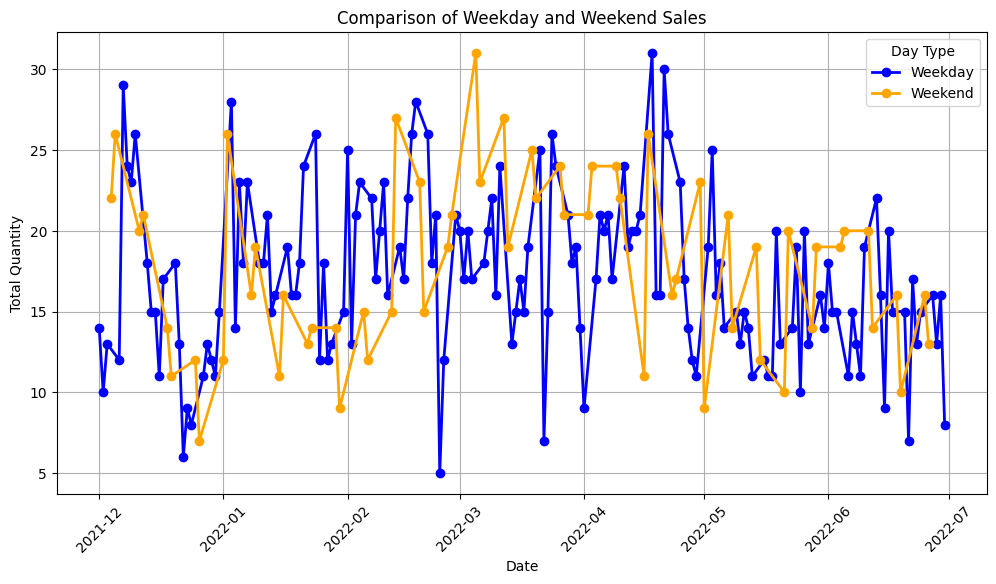

Weekday Sales: 2600.0
Weekend Sales: 1072.0


In [128]:
# Add a new column 'Weekday' to categorize the days
merged_data['Weekday'] = merged_data['Day Index'].dt.dayofweek

# Create a new column to categorize into 'Weekday' and 'Weekend'
merged_data['Day Type'] = merged_data['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by 'Day Type' and Day Index, then sum the Quantity
day_type_quantity = merged_data.groupby(['Day Type', 'Day Index'])['Quantity'].sum().reset_index()

# Separate data for weekdays and weekends
weekday_data = day_type_quantity[day_type_quantity['Day Type'] == 'Weekday']
weekend_data = day_type_quantity[day_type_quantity['Day Type'] == 'Weekend']

# Plot the comparison using a line plot
plt.figure(figsize=(12, 6))

# Plot weekday data
plt.plot(weekday_data['Day Index'], weekday_data['Quantity'], label='Weekday', marker='o', linestyle='-', linewidth=2, color='blue')

# Plot weekend data
plt.plot(weekend_data['Day Index'], weekend_data['Quantity'], label='Weekend', marker='o', linestyle='-', linewidth=2, color='orange')

plt.title('Comparison of Weekday and Weekend Sales')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend(title='Day Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
weekday_sales = day_type_quantity[day_type_quantity['Day Type'] == 'Weekday']['Quantity'].sum()
weekend_sales = day_type_quantity[day_type_quantity['Day Type'] == 'Weekend']['Quantity'].sum()
print(f"Weekday Sales: {weekday_sales}")
print(f"Weekend Sales: {weekend_sales}")



###Weekend sales show more variability, with some peaks indicating high sales on certain weekends.

##Comparison of Weekday and Weekend Clicks

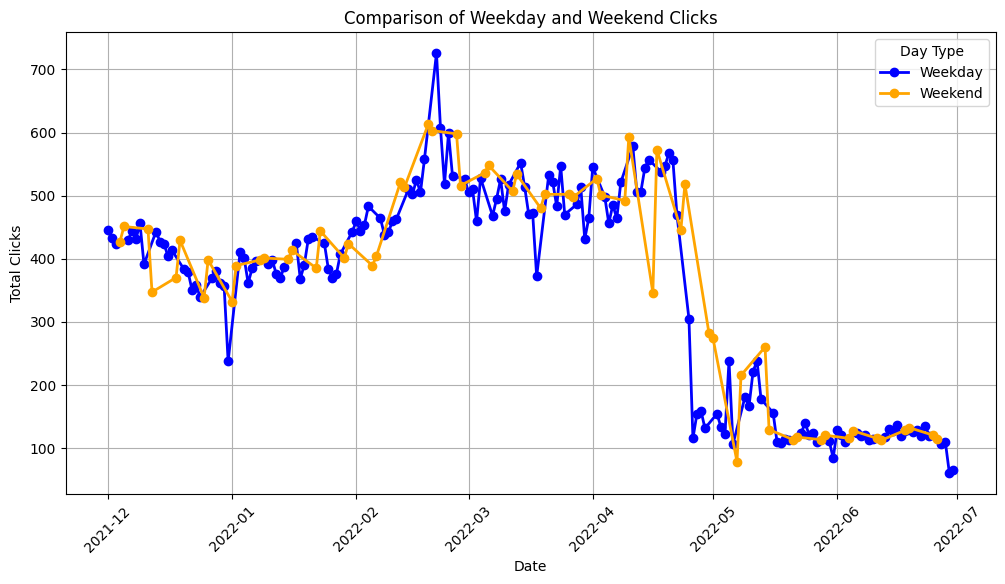

Weekday Clicks: 53822
Weekend Clicks: 22117


In [129]:
# Group by 'Day Type' and Day Index, then sum the Clicks
day_type_clicks = merged_data.groupby(['Day Type', 'Day Index'])['Clicks'].sum().reset_index()

# Separate data for weekdays and weekends
weekday_clicks = day_type_clicks[day_type_clicks['Day Type'] == 'Weekday']
weekend_clicks = day_type_clicks[day_type_clicks['Day Type'] == 'Weekend']

# Plot the comparison using a line plot
plt.figure(figsize=(12, 6))

# Plot weekday data
plt.plot(weekday_clicks['Day Index'], weekday_clicks['Clicks'], label='Weekday', marker='o', linestyle='-', linewidth=2, color='blue')

# Plot weekend data
plt.plot(weekend_clicks['Day Index'], weekend_clicks['Clicks'], label='Weekend', marker='o', linestyle='-', linewidth=2, color='orange')

plt.title('Comparison of Weekday and Weekend Clicks')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.legend(title='Day Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
weekday_clicks_total = day_type_clicks[day_type_clicks['Day Type'] == 'Weekday']['Clicks'].sum()
weekend_clicks_total = day_type_clicks[day_type_clicks['Day Type'] == 'Weekend']['Clicks'].sum()
print(f"Weekday Clicks: {weekday_clicks_total}")
print(f"Weekend Clicks: {weekend_clicks_total}")


###Weekday clicks are higher overall compared to weekend clicks.

##Comparison of Weekday and Weekend Impressions

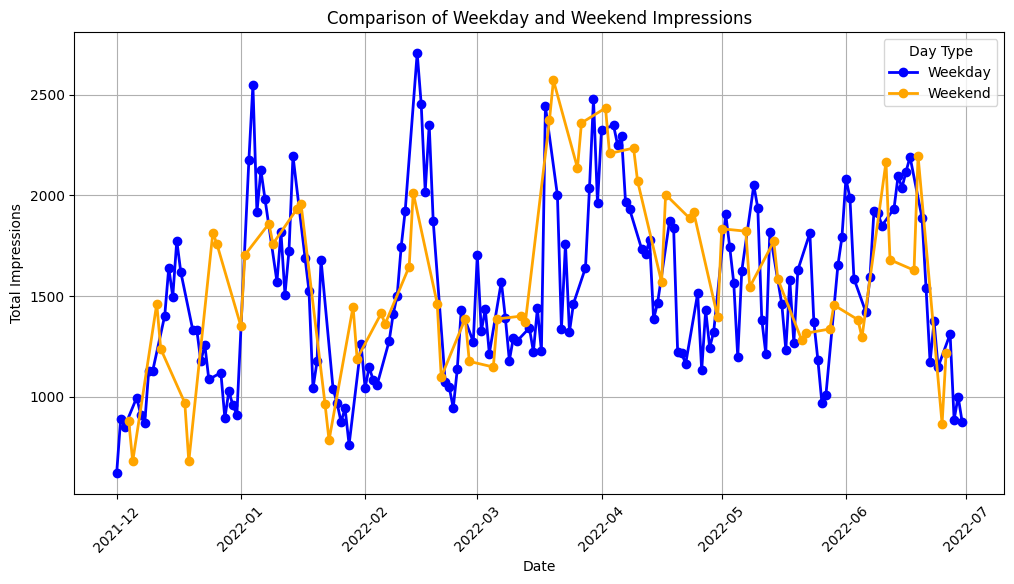

Weekday Impressions: 229914
Weekend Impressions: 94807


In [130]:
# Group by 'Day Type' and Day Index, then sum the Impressions
day_type_impressions = merged_data.groupby(['Day Type', 'Day Index'])['Impressions'].sum().reset_index()

# Separate data for weekdays and weekends
weekday_impressions = day_type_impressions[day_type_impressions['Day Type'] == 'Weekday']
weekend_impressions = day_type_impressions[day_type_impressions['Day Type'] == 'Weekend']

# Plot the comparison using a line plot
plt.figure(figsize=(12, 6))

# Plot weekday data
plt.plot(weekday_impressions['Day Index'], weekday_impressions['Impressions'], label='Weekday', marker='o', linestyle='-', linewidth=2, color='blue')

# Plot weekend data
plt.plot(weekend_impressions['Day Index'], weekend_impressions['Impressions'], label='Weekend', marker='o', linestyle='-', linewidth=2, color='orange')

plt.title('Comparison of Weekday and Weekend Impressions')
plt.xlabel('Date')
plt.ylabel('Total Impressions')
plt.legend(title='Day Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
weekday_impressions_total = day_type_impressions[day_type_impressions['Day Type'] == 'Weekday']['Impressions'].sum()
weekend_impressions_total = day_type_impressions[day_type_impressions['Day Type'] == 'Weekend']['Impressions'].sum()
print(f"Weekday Impressions: {weekday_impressions_total}")
print(f"Weekend Impressions: {weekend_impressions_total}")


###Weekday impressions are higher, suggesting more visibility during weekdays.

##MONTH WISE ANALYSIS

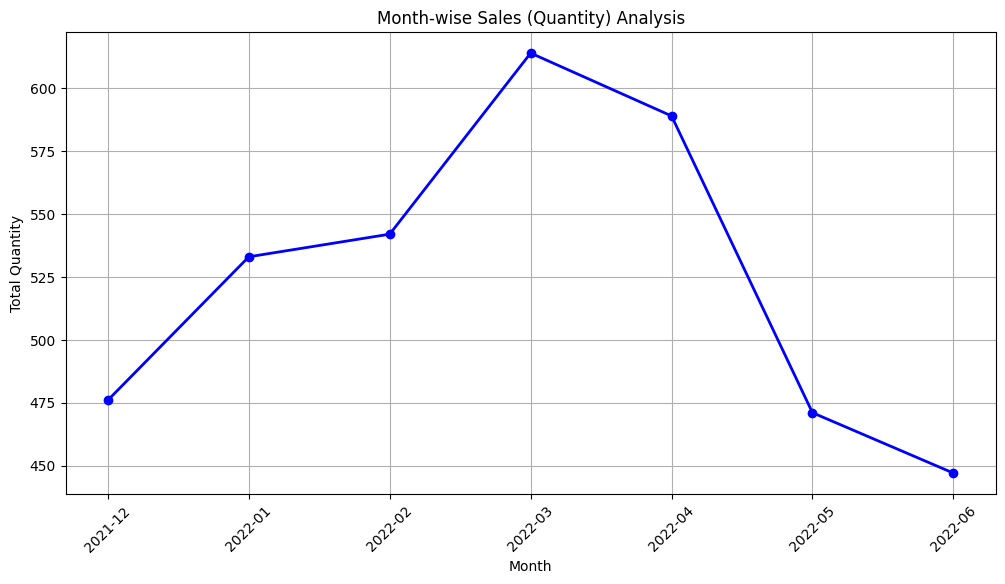

Sales peaked in 2022-03.
Sales were lowest in 2022-06.


In [131]:
# Extract the month and year from the 'Day Index'
merged_data['Month'] = merged_data['Day Index'].dt.to_period('M')

# Group by Month and sum the Quantity
month_quantity = merged_data.groupby('Month')['Quantity'].sum().reset_index()

# Plot the month-wise sales
plt.figure(figsize=(12, 6))
plt.plot(month_quantity['Month'].astype(str), month_quantity['Quantity'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Month-wise Sales (Quantity) Analysis')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
max_quantity_month = month_quantity.loc[month_quantity['Quantity'].idxmax()]['Month']
min_quantity_month = month_quantity.loc[month_quantity['Quantity'].idxmin()]['Month']
print(f"Sales peaked in {max_quantity_month}.")
print(f"Sales were lowest in {min_quantity_month}.")


##Month-wise Analysis of Clicks

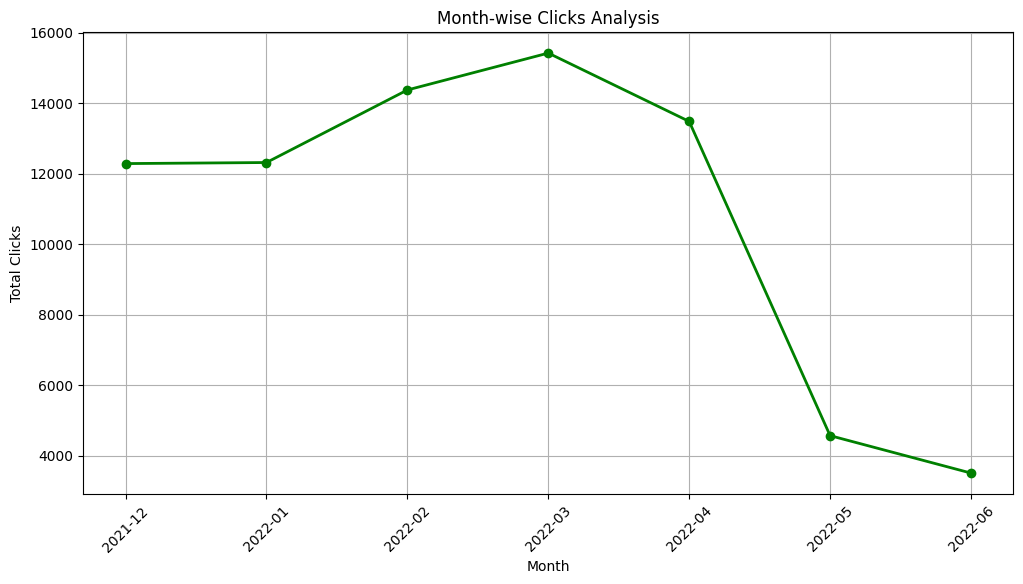

Clicks peaked in 2022-03.
Clicks were lowest in 2022-06.


In [132]:
# Group by Month and sum the Clicks
month_clicks = merged_data.groupby('Month')['Clicks'].sum().reset_index()

# Plot the month-wise clicks
plt.figure(figsize=(12, 6))
plt.plot(month_clicks['Month'].astype(str), month_clicks['Clicks'], marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Month-wise Clicks Analysis')
plt.xlabel('Month')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
max_clicks_month = month_clicks.loc[month_clicks['Clicks'].idxmax()]['Month']
min_clicks_month = month_clicks.loc[month_clicks['Clicks'].idxmin()]['Month']
print(f"Clicks peaked in {max_clicks_month}.")
print(f"Clicks were lowest in {min_clicks_month}.")


##Month-wise Analysis of Impressions

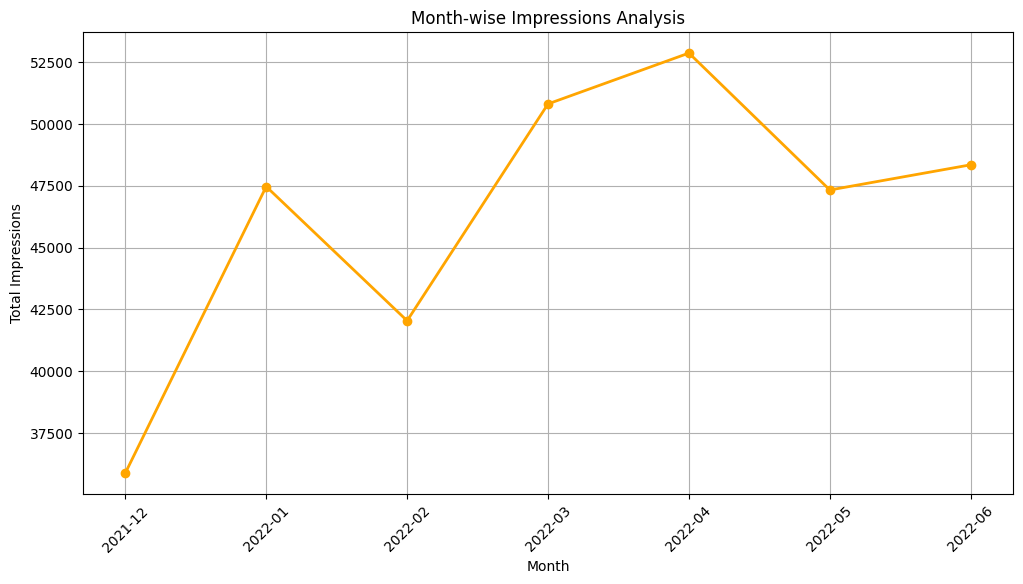

Impressions peaked in 2022-04.
Impressions were lowest in 2021-12.


In [133]:
# Group by Month and sum the Impressions
month_impressions = merged_data.groupby('Month')['Impressions'].sum().reset_index()

# Plot the month-wise impressions
plt.figure(figsize=(12, 6))
plt.plot(month_impressions['Month'].astype(str), month_impressions['Impressions'], marker='o', color='orange', linestyle='-', linewidth=2)
plt.title('Month-wise Impressions Analysis')
plt.xlabel('Month')
plt.ylabel('Total Impressions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
max_impressions_month = month_impressions.loc[month_impressions['Impressions'].idxmax()]['Month']
min_impressions_month = month_impressions.loc[month_impressions['Impressions'].idxmin()]['Month']
print(f"Impressions peaked in {max_impressions_month}.")
print(f"Impressions were lowest in {min_impressions_month}.")


##Quarter wise analysis

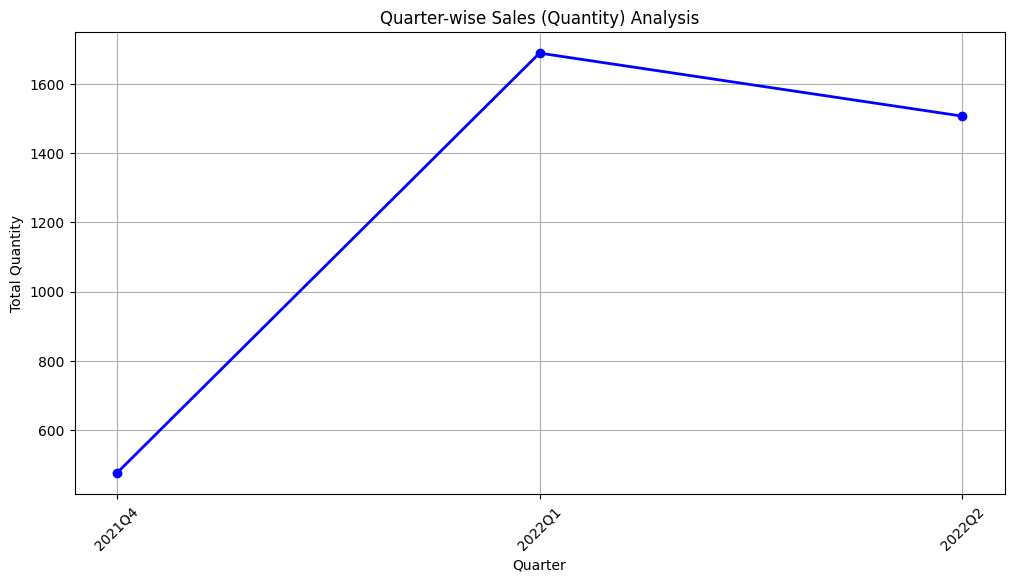

Sales peaked in 2022Q1.
Sales were lowest in 2021Q4.


In [135]:
# Extract the quarter from the 'Day Index'
merged_data['Quarter'] = merged_data['Day Index'].dt.to_period('Q')

# Group by Quarter and sum the Quantity
quarter_quantity = merged_data.groupby('Quarter')['Quantity'].sum().reset_index()

# Plot the quarter-wise sales
plt.figure(figsize=(12, 6))
plt.plot(quarter_quantity['Quarter'].astype(str), quarter_quantity['Quantity'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Quarter-wise Sales (Quantity) Analysis')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
max_quantity_quarter = quarter_quantity.loc[quarter_quantity['Quantity'].idxmax()]['Quarter']
min_quantity_quarter = quarter_quantity.loc[quarter_quantity['Quantity'].idxmin()]['Quarter']
print(f"Sales peaked in {max_quantity_quarter}.")
print(f"Sales were lowest in {min_quantity_quarter}.")


##Quarter-wise Clicks Analysis

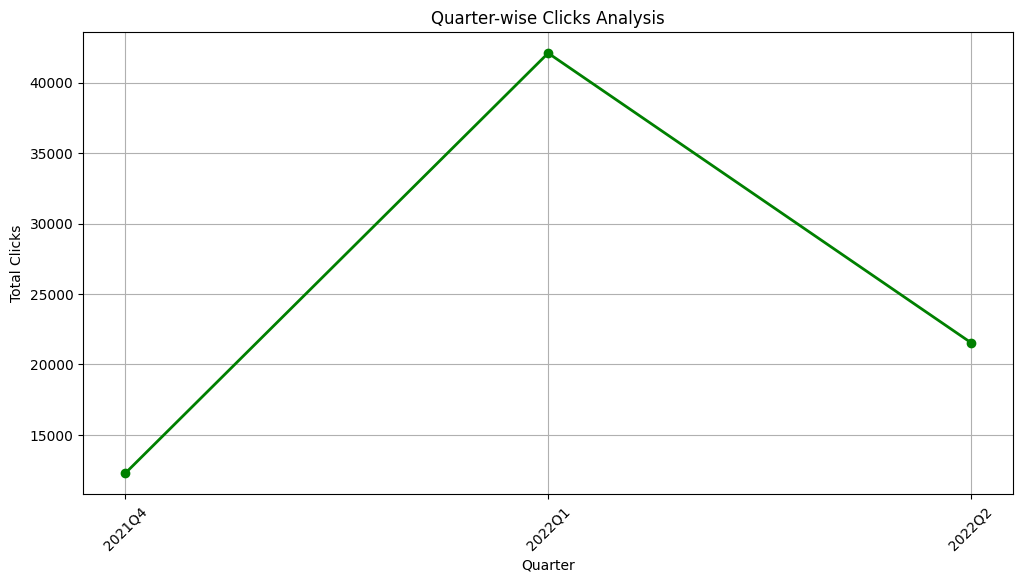

Clicks peaked in 2022Q1.
Clicks were lowest in 2021Q4.


In [136]:
# Group by Quarter and sum the Clicks
quarter_clicks = merged_data.groupby('Quarter')['Clicks'].sum().reset_index()

# Plot the quarter-wise clicks
plt.figure(figsize=(12, 6))
plt.plot(quarter_clicks['Quarter'].astype(str), quarter_clicks['Clicks'], marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Quarter-wise Clicks Analysis')
plt.xlabel('Quarter')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
max_clicks_quarter = quarter_clicks.loc[quarter_clicks['Clicks'].idxmax()]['Quarter']
min_clicks_quarter = quarter_clicks.loc[quarter_clicks['Clicks'].idxmin()]['Quarter']
print(f"Clicks peaked in {max_clicks_quarter}.")
print(f"Clicks were lowest in {min_clicks_quarter}.")


##Quarter-wise Impressions Analysis

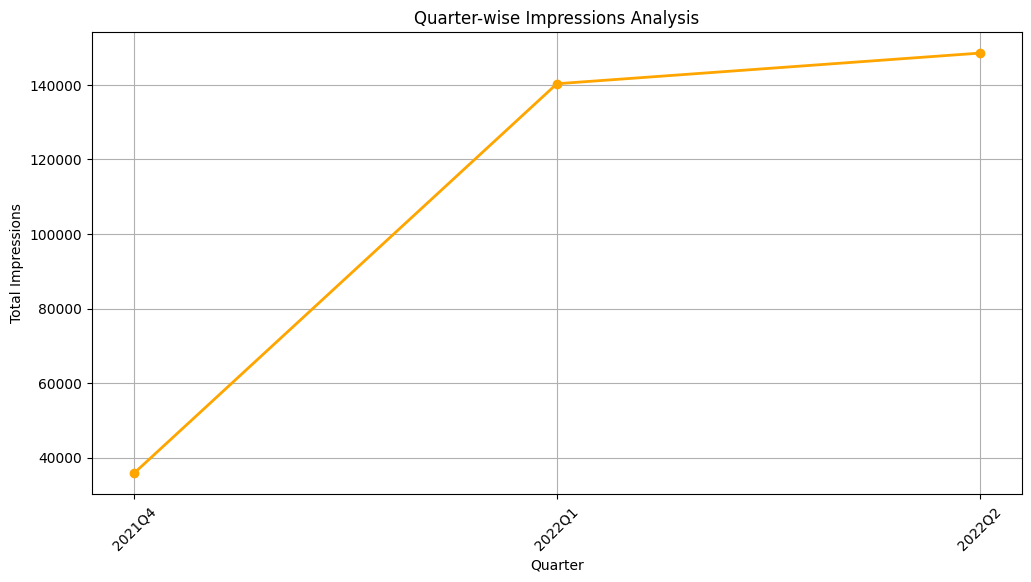

Impressions peaked in 2022Q2.
Impressions were lowest in 2021Q4.


In [137]:
# Group by Quarter and sum the Impressions
quarter_impressions = merged_data.groupby('Quarter')['Impressions'].sum().reset_index()

# Plot the quarter-wise impressions
plt.figure(figsize=(12, 6))
plt.plot(quarter_impressions['Quarter'].astype(str), quarter_impressions['Impressions'], marker='o', color='orange', linestyle='-', linewidth=2)
plt.title('Quarter-wise Impressions Analysis')
plt.xlabel('Quarter')
plt.ylabel('Total Impressions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Points for this:
max_impressions_quarter = quarter_impressions.loc[quarter_impressions['Impressions'].idxmax()]['Quarter']
min_impressions_quarter = quarter_impressions.loc[quarter_impressions['Impressions'].idxmin()]['Quarter']
print(f"Impressions peaked in {max_impressions_quarter}.")
print(f"Impressions were lowest in {min_impressions_quarter}.")


##Monthly Sales (Quantity) Analysis

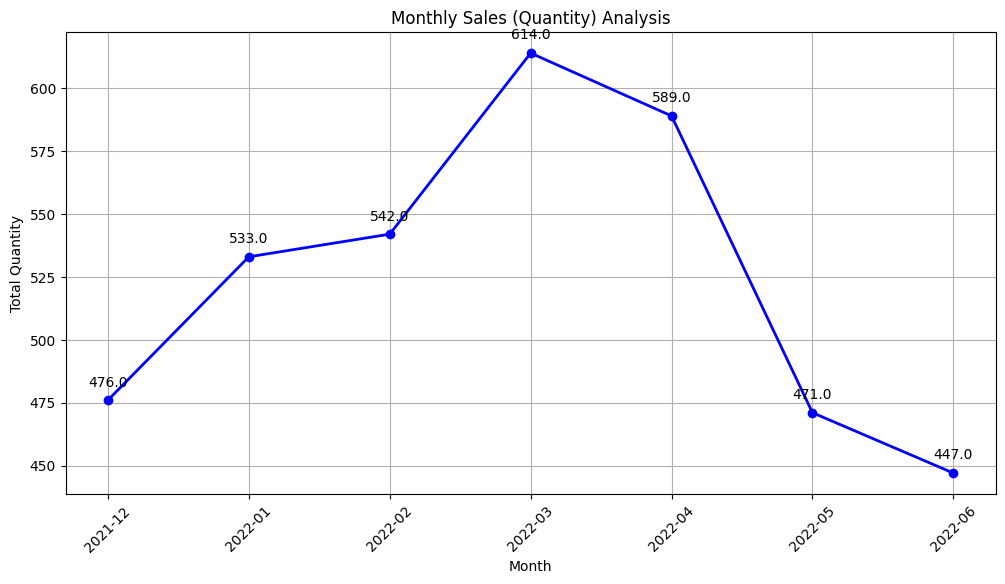

In [139]:
# Group by Month and sum the Quantity
monthly_quantity = merged_data.groupby('Month')['Quantity'].sum().reset_index()

# Plot the monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_quantity['Month'].astype(str), monthly_quantity['Quantity'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Monthly Sales (Quantity) Analysis')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.grid(True)

# Add annotations for all data points
for i in range(len(monthly_quantity)):
    plt.annotate(str(monthly_quantity['Quantity'][i]), 
                 xy=(monthly_quantity['Month'][i].strftime('%Y-%m'), monthly_quantity['Quantity'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.show()



##Monthly Clicks Analysis

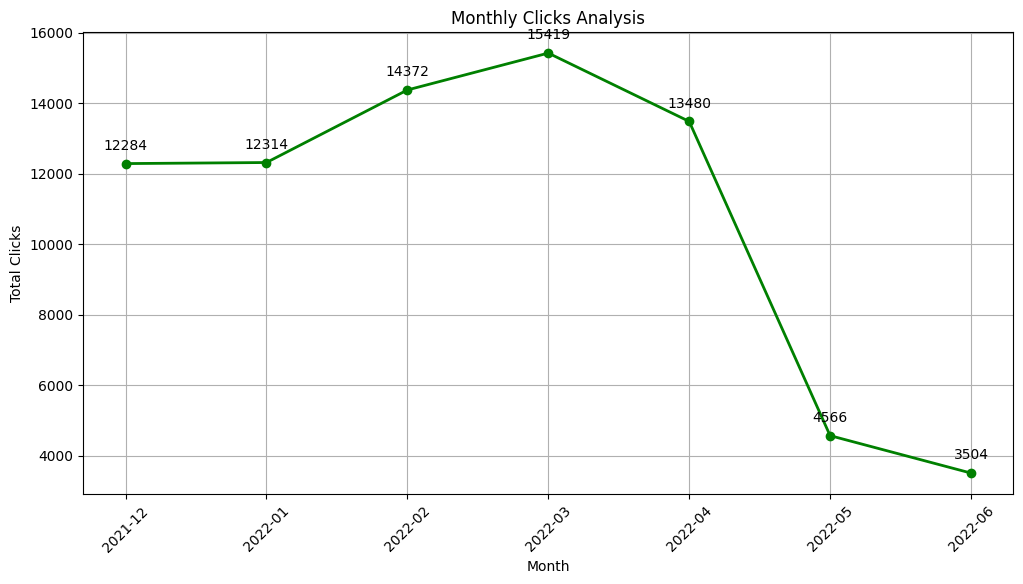

In [140]:
# Group by Month and sum the Clicks
monthly_clicks = merged_data.groupby('Month')['Clicks'].sum().reset_index()

# Plot the monthly clicks
plt.figure(figsize=(12, 6))
plt.plot(monthly_clicks['Month'].astype(str), monthly_clicks['Clicks'], marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Monthly Clicks Analysis')
plt.xlabel('Month')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.grid(True)

# Add annotations for all data points
for i in range(len(monthly_clicks)):
    plt.annotate(str(monthly_clicks['Clicks'][i]), 
                 xy=(monthly_clicks['Month'][i].strftime('%Y-%m'), monthly_clicks['Clicks'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


##Monthly Clicks Analysis

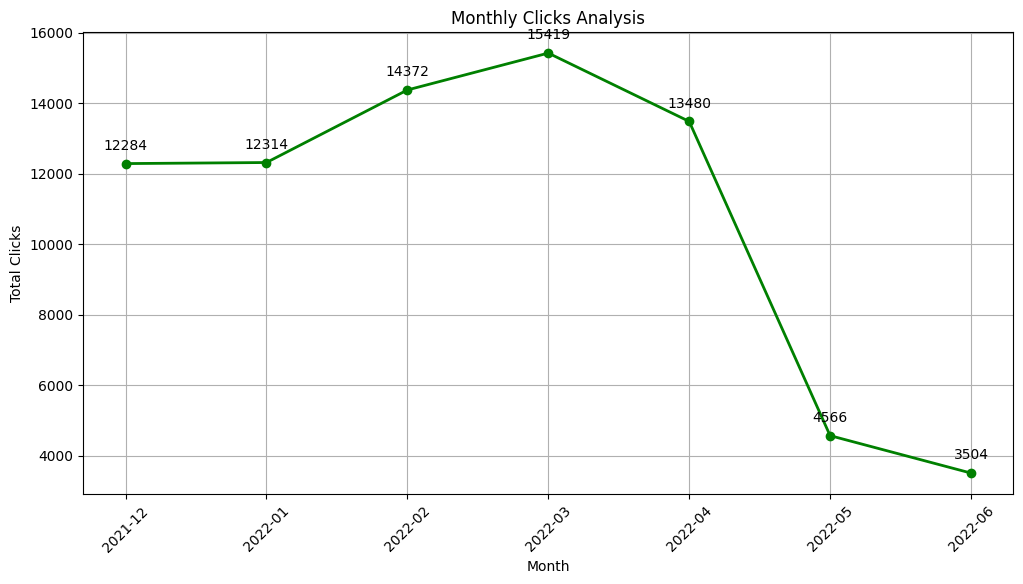

In [141]:
# Group by Month and sum the Clicks
monthly_clicks = merged_data.groupby('Month')['Clicks'].sum().reset_index()

# Plot the monthly clicks
plt.figure(figsize=(12, 6))
plt.plot(monthly_clicks['Month'].astype(str), monthly_clicks['Clicks'], marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Monthly Clicks Analysis')
plt.xlabel('Month')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.grid(True)

# Add annotations for all data points
for i in range(len(monthly_clicks)):
    plt.annotate(str(monthly_clicks['Clicks'][i]), 
                 xy=(monthly_clicks['Month'][i].strftime('%Y-%m'), monthly_clicks['Clicks'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


##Monthly Trends for Sales (Quantity), Clicks, and Impressions

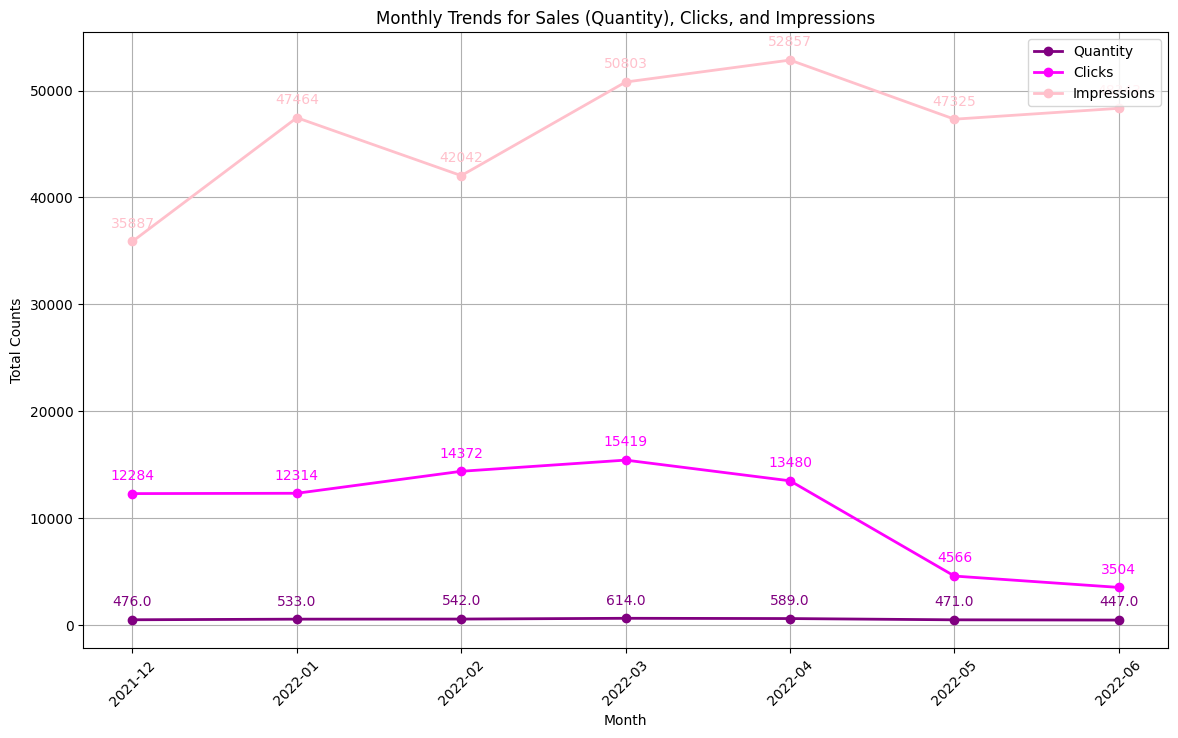

In [ ]:
# Group by Month and sum the Quantity, Clicks, and Impressions
monthly_data = merged_data.groupby('Month').sum().reset_index()

# Plot the monthly trends
plt.figure(figsize=(14, 8))

# Plot for Quantity
plt.plot(monthly_data['Month'].astype(str), monthly_data['Quantity'], marker='o', color='purple', linestyle='-', linewidth=2, label='Quantity')
for i in range(len(monthly_data)):
    plt.annotate(str(monthly_data['Quantity'][i]), 
                 xy=(monthly_data['Month'][i].strftime('%Y-%m'), monthly_data['Quantity'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', color='purple')

# Plot for Clicks
plt.plot(monthly_data['Month'].astype(str), monthly_data['Clicks'], marker='o', color='magenta', linestyle='-', linewidth=2, label='Clicks')
for i in range(len(monthly_data)):
    plt.annotate(str(monthly_data['Clicks'][i]), 
                 xy=(monthly_data['Month'][i].strftime('%Y-%m'), monthly_data['Clicks'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', color='magenta')

# Plot for Impressions
plt.plot(monthly_data['Month'].astype(str), monthly_data['Impressions'], marker='o', color='pink', linestyle='-', linewidth=2, label='Impressions')
for i in range(len(monthly_data)):
    plt.annotate(str(monthly_data['Impressions'][i]), 
                 xy=(monthly_data['Month'][i].strftime('%Y-%m'), monthly_data['Impressions'][i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', color='pink')

plt.title('Monthly Trends for Sales (Quantity), Clicks, and Impressions')
plt.xlabel('Month')
plt.ylabel('Total Counts')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

